In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
# Load the imputed dataset
data = pd.read_csv("E:/AI engineer/Guvi/Capstone Projects/Project3/fresh_clone/SmartPremium/data/train.csv")

# Display the first few rows
data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [4]:
data.describe(include="all")

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
count,1.200000e+06,1.181295e+06,1200000,1.155051e+06,1181471,1.090328e+06,1200000,841925,1.125924e+06,1200000,...,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1200000,1122176,1200000,1200000,1200000,1.200000e+06
unique,NaN,NaN,2,NaN,3,NaN,4,3,NaN,3,...,NaN,NaN,NaN,NaN,167381,3,2,4,3,NaN
top,NaN,NaN,Male,NaN,Single,NaN,Master's,Employed,NaN,Suburban,...,NaN,NaN,NaN,NaN,2020-02-08 15:21:39.134960,Average,Yes,Weekly,House,NaN
freq,NaN,NaN,602571,NaN,395391,NaN,303818,282750,NaN,401542,...,NaN,NaN,NaN,NaN,142,377905,601873,306179,400349,NaN
mean,5.999995e+05,4.114556e+01,NaN,3.274522e+04,NaN,2.009934e+00,NaN,NaN,2.561391e+01,NaN,...,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,NaN,NaN,NaN,NaN,NaN,1.102545e+03
std,3.464103e+05,1.353995e+01,NaN,3.217951e+04,NaN,1.417338e+00,NaN,NaN,1.220346e+01,NaN,...,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,NaN,NaN,NaN,NaN,NaN,8.649989e+02
min,0.000000e+00,1.800000e+01,NaN,1.000000e+00,NaN,0.000000e+00,NaN,NaN,2.012237e+00,NaN,...,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,NaN,NaN,NaN,NaN,NaN,2.000000e+01
25%,2.999998e+05,3.000000e+01,NaN,8.001000e+03,NaN,1.000000e+00,NaN,NaN,1.591896e+01,NaN,...,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,NaN,NaN,NaN,NaN,NaN,5.140000e+02
50%,5.999995e+05,4.100000e+01,NaN,2.391100e+04,NaN,2.000000e+00,NaN,NaN,2.457865e+01,NaN,...,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,NaN,NaN,NaN,NaN,NaN,8.720000e+02
75%,8.999992e+05,5.300000e+01,NaN,4.463400e+04,NaN,3.000000e+00,NaN,NaN,3.452721e+01,NaN,...,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,NaN,NaN,NaN,NaN,NaN,1.509000e+03


In [5]:
# Convert Policy Start Date to datetime
data['Policy Start Date'] = pd.to_datetime(data['Policy Start Date'])
data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [6]:
numerical_features,categorical_features=[],[]
for i in data.columns.to_list():
      if data[i].dtype == 'object':
        categorical_features.append(i)
      else:
        numerical_features.append(i)

print("===========")
print("Numerical columns List:- ",numerical_features,len(numerical_features),sep="\n")
print("===========")
print("Categorical columns List:- ",categorical_features,len(categorical_features),sep="\n")


Numerical columns List:- 
['id', 'Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Policy Start Date', 'Premium Amount']
11
Categorical columns List:- 
['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']
10


## --- Univariate Analysis ---

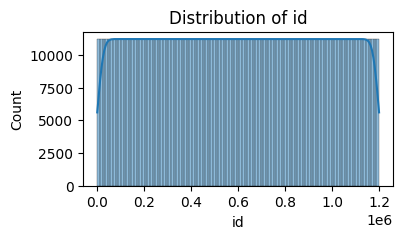

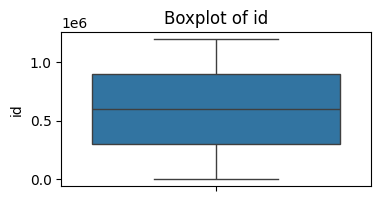

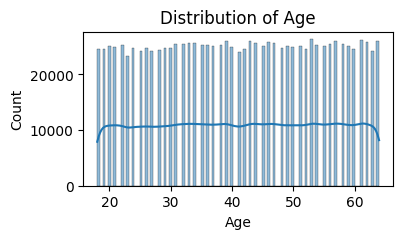

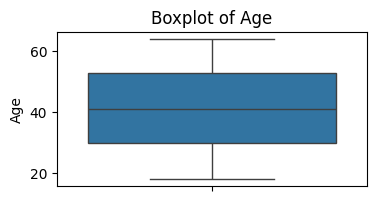

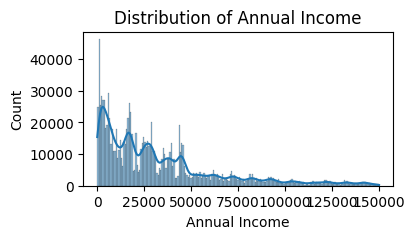

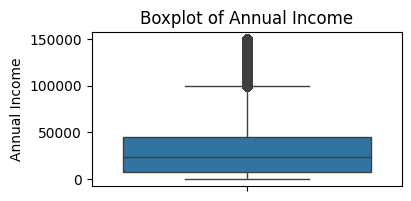

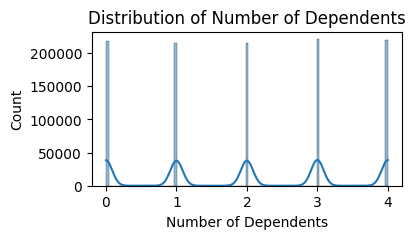

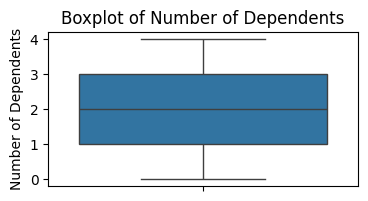

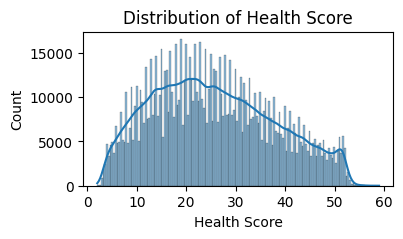

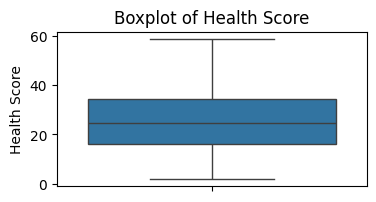

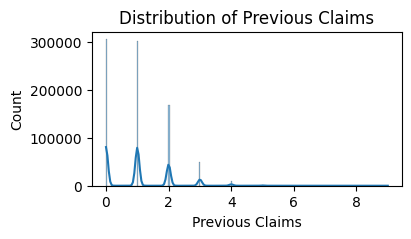

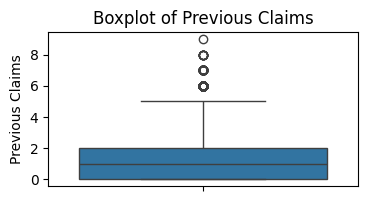

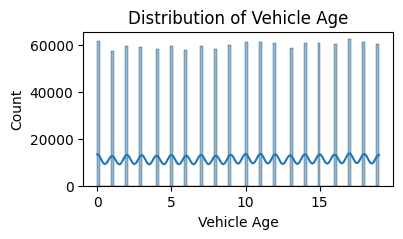

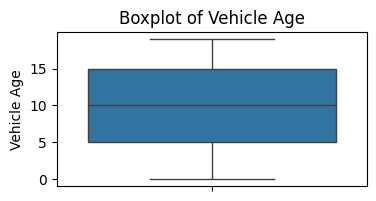

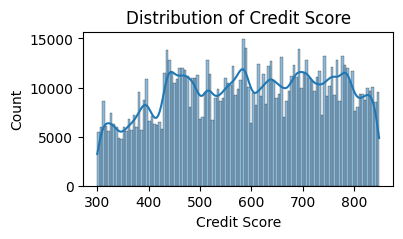

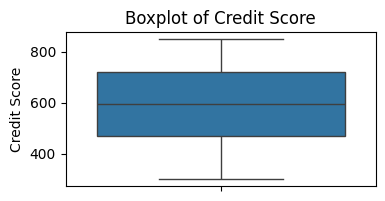

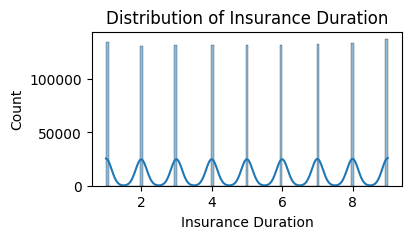

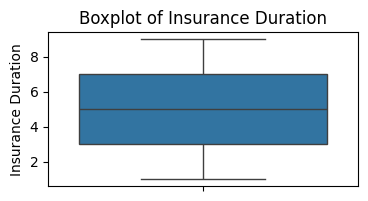

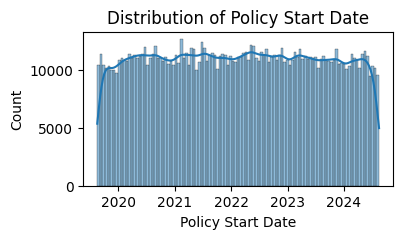

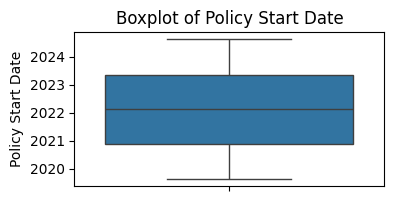

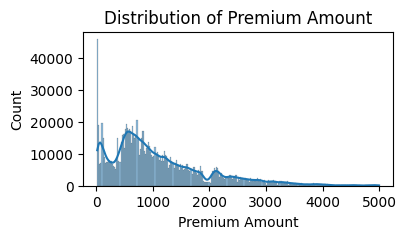

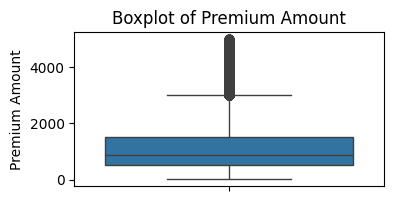

In [7]:
# Numerical Variables
for col in numerical_features:
    plt.figure(figsize=(4,2))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    
    plt.show()
    plt.figure(figsize=(4,2))
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [8]:
for i in ['Previous Claims','Number of Dependents','Insurance Duration','Vehicle Age']:
    numerical_features.remove(i)
    categorical_features.append(i)

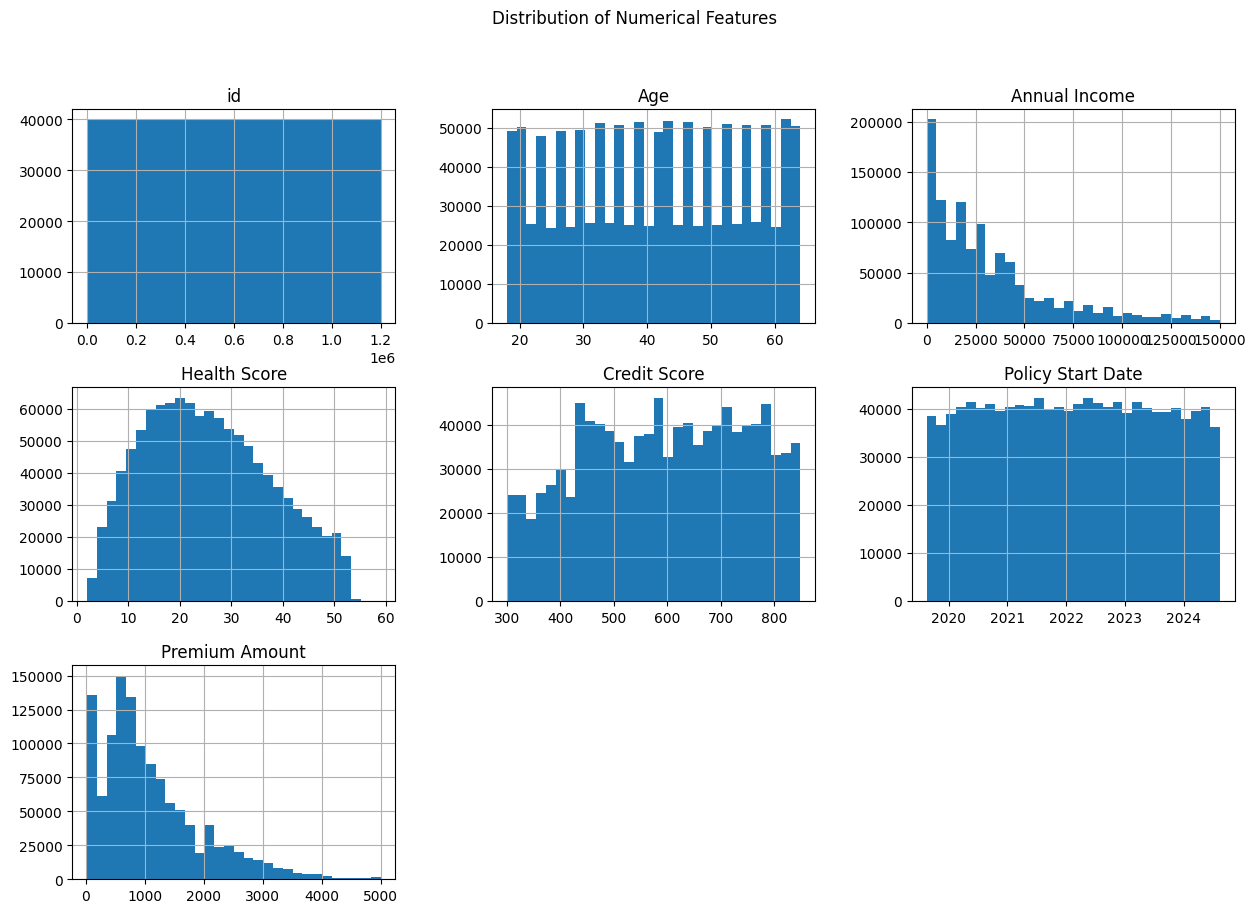

In [9]:
# Plot histograms for numerical features
data[numerical_features].hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features")
plt.show()

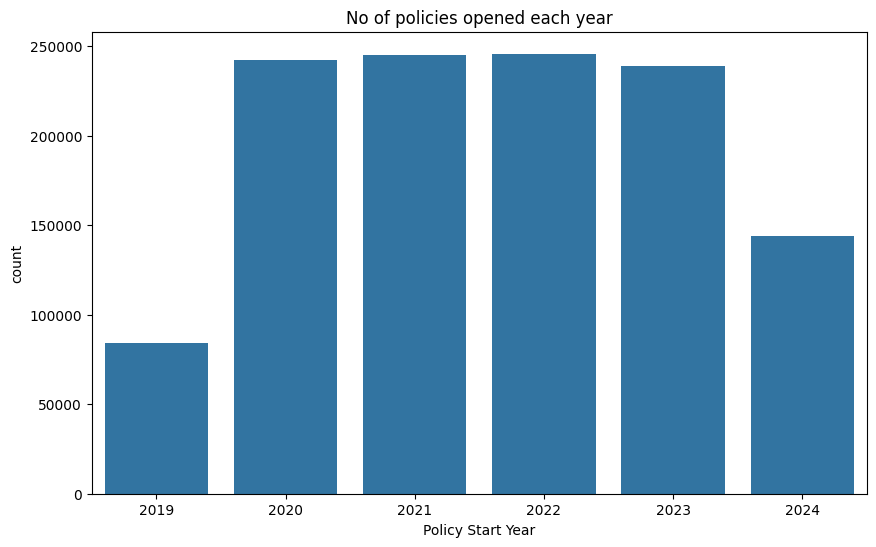

In [10]:
data['Policy Start Year'] = data['Policy Start Date'].dt.year
plt.figure(figsize=(10, 6))
sns.countplot(x='Policy Start Year', data=data)
plt.title('No of policies opened each year')
plt.show()

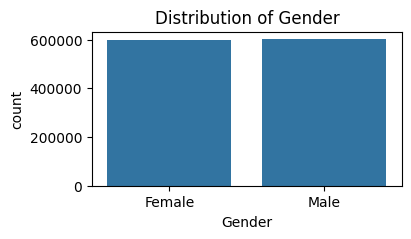

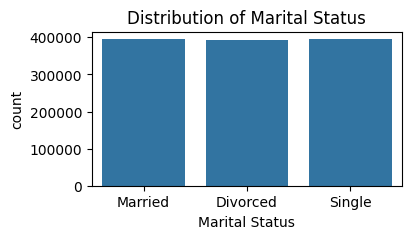

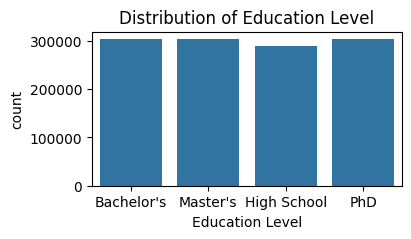

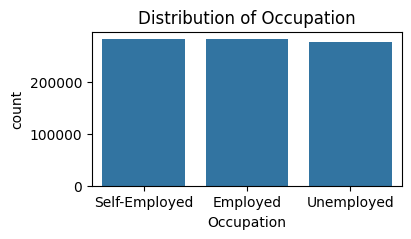

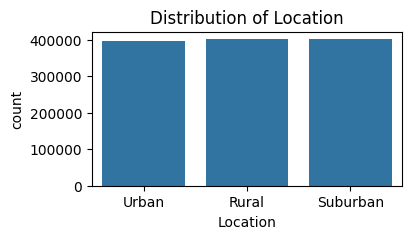

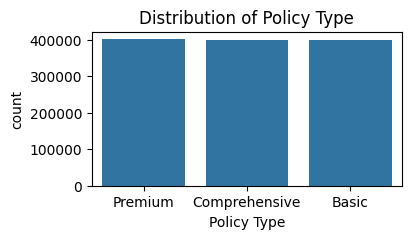

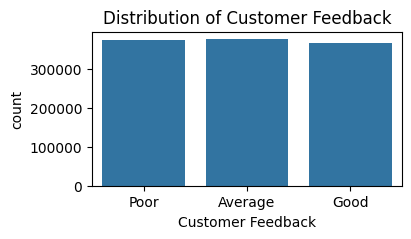

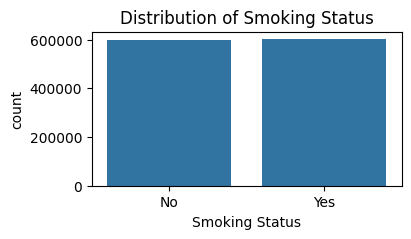

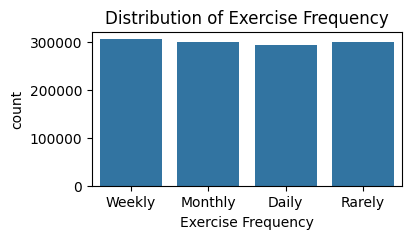

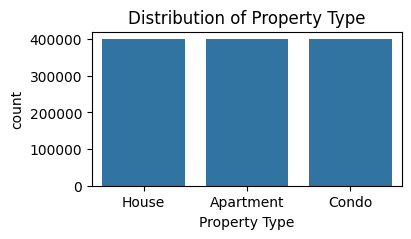

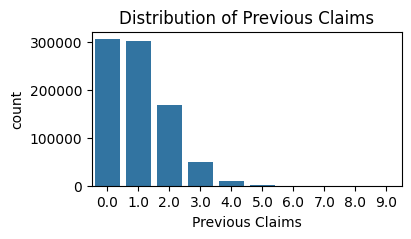

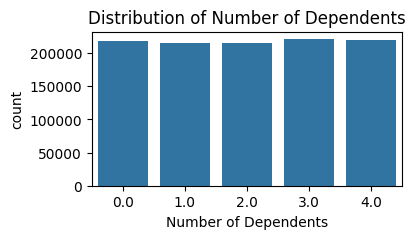

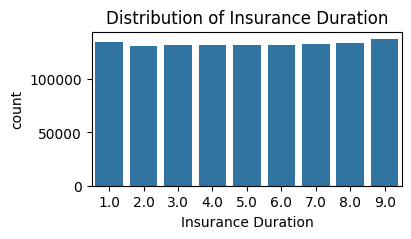

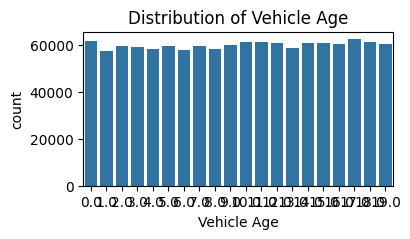

In [11]:
for feature in categorical_features:
    plt.figure(figsize=(4,2))
    sns.countplot(x=feature, data=data)
    plt.title(f"Distribution of {feature}")
    plt.show()

#### Outliers

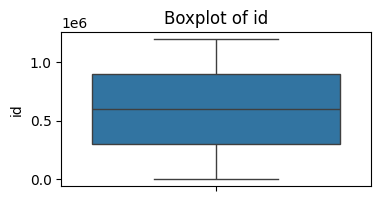

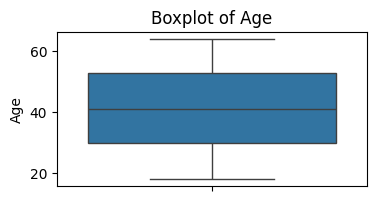

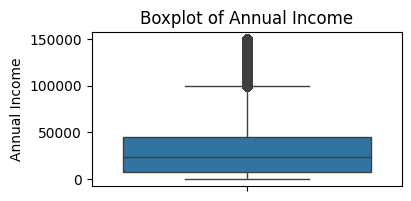

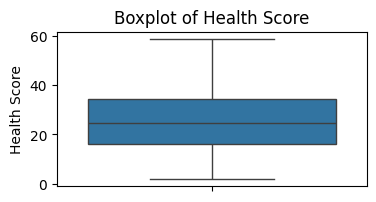

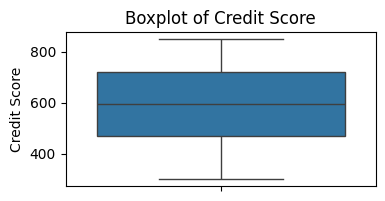

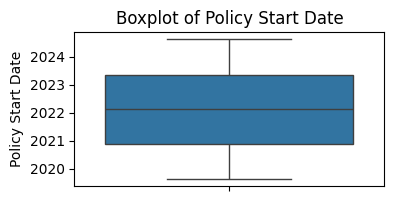

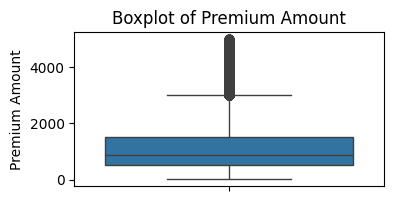

In [12]:
for feature in numerical_features:
    plt.figure(figsize=(4,2))
    sns.boxplot(y=data[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()

#### Correlations

Premium Amount          1.000000
Previous Claims         0.039364
Health Score            0.014326
Vehicle Age             0.000391
Insurance Duration     -0.000028
Number of Dependents   -0.000928
Age                    -0.002411
Annual Income          -0.012091
Credit Score           -0.024438
Name: Premium Amount, dtype: float64


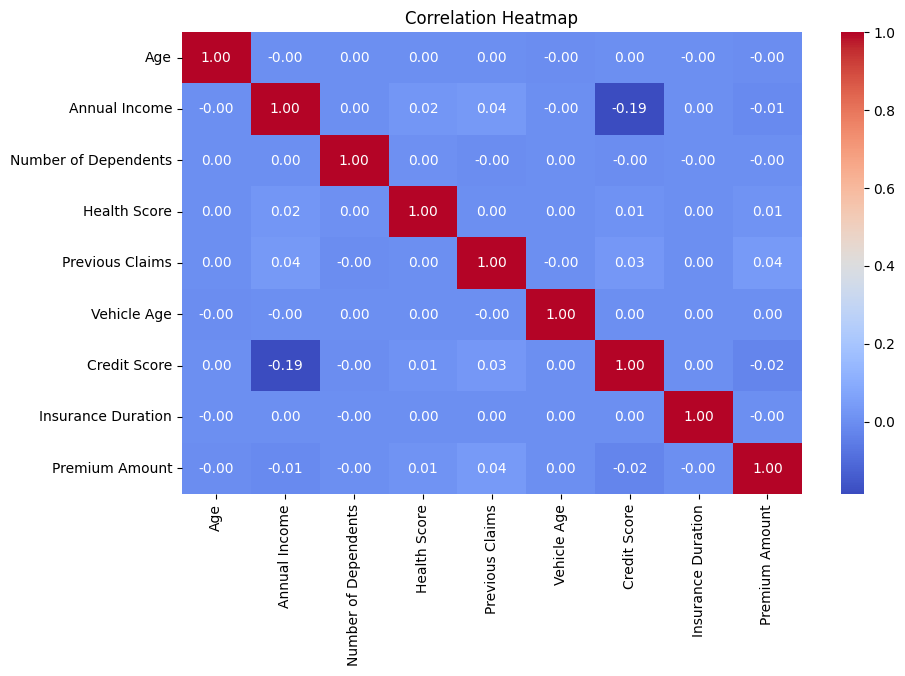

In [78]:
# Correlation with target variable
corr_matrix=data[[ 'Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',  'Premium Amount']].corr()
print(corr_matrix['Premium Amount'].sort_values(ascending=False))
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

categorical vs numerical

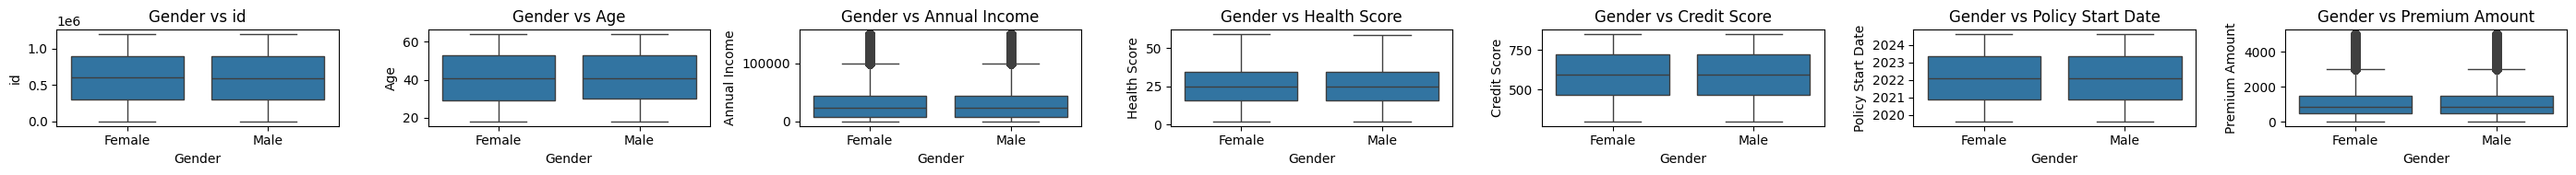

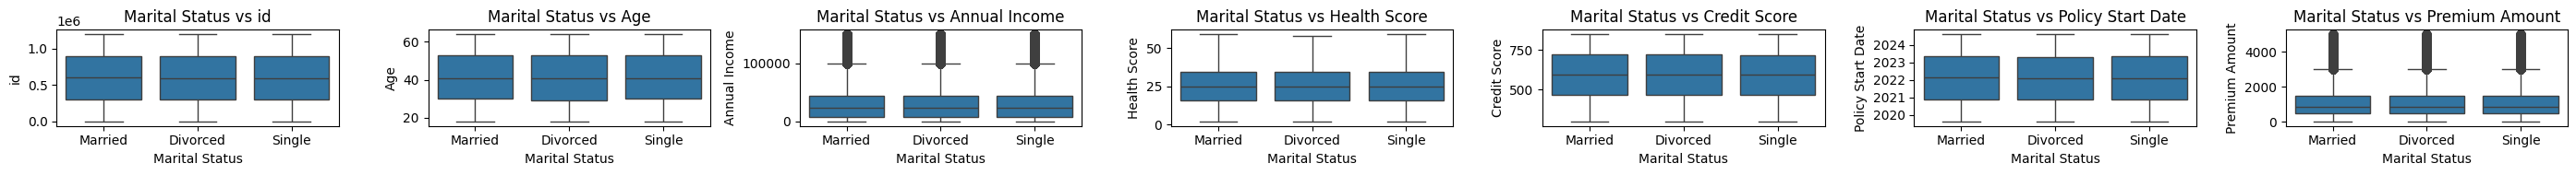

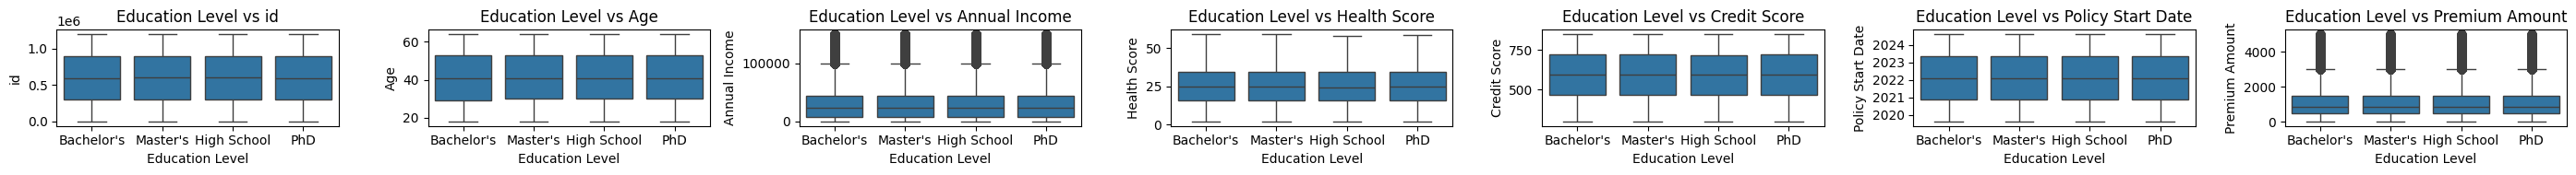

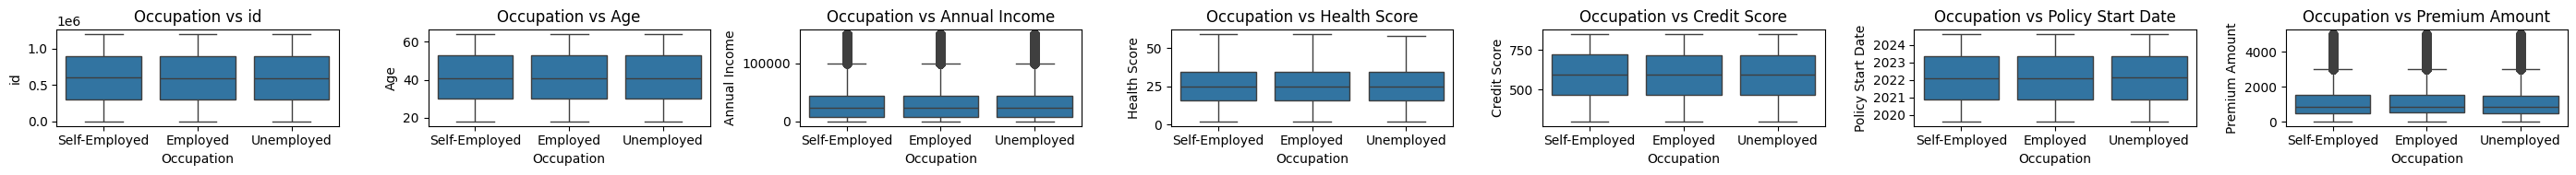

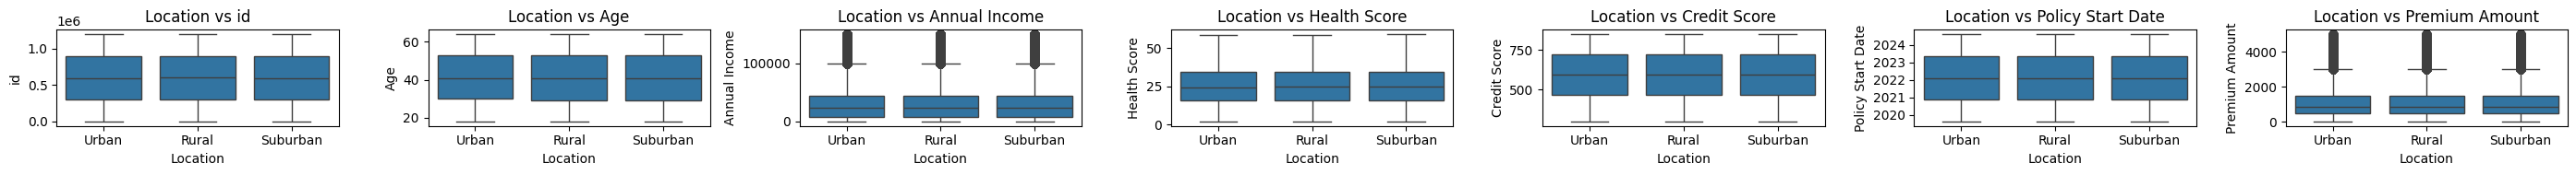

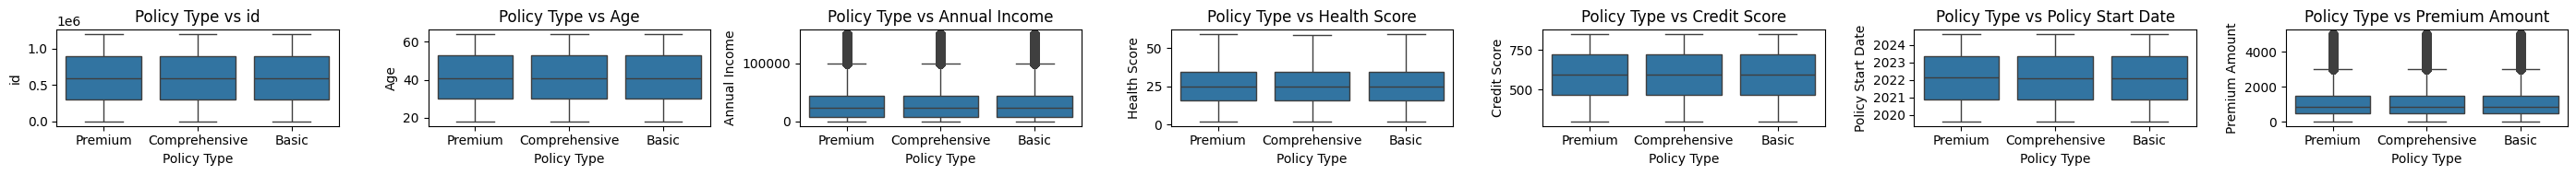

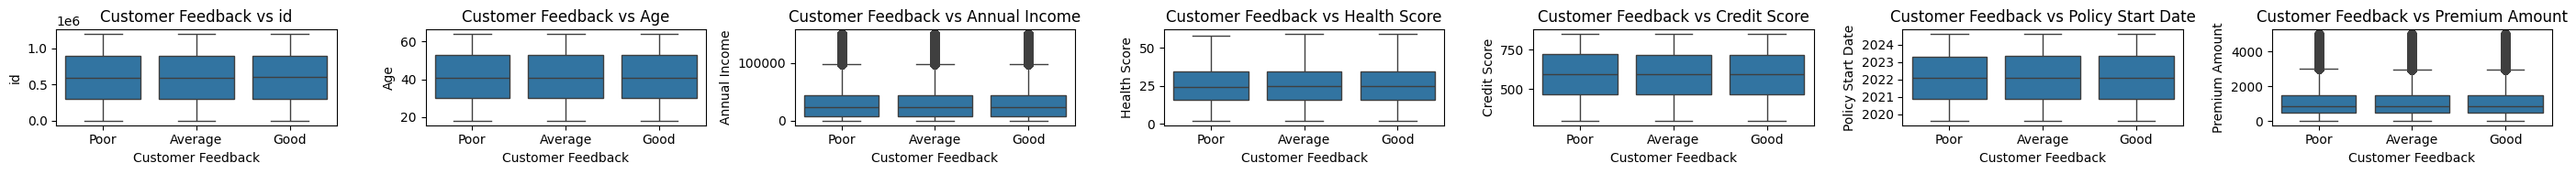

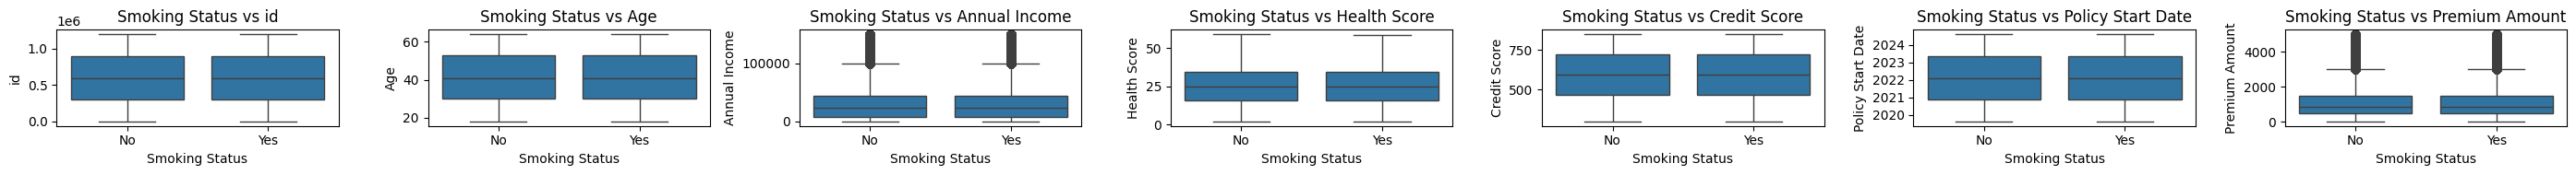

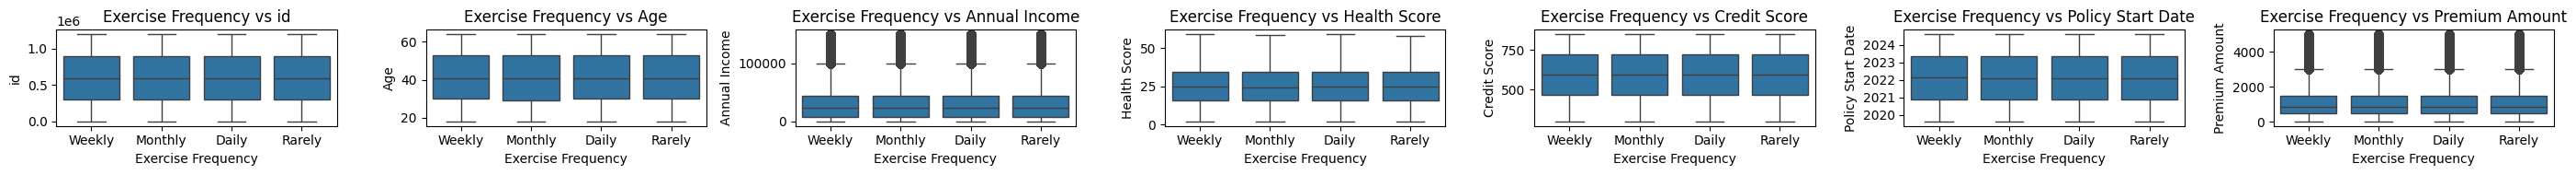

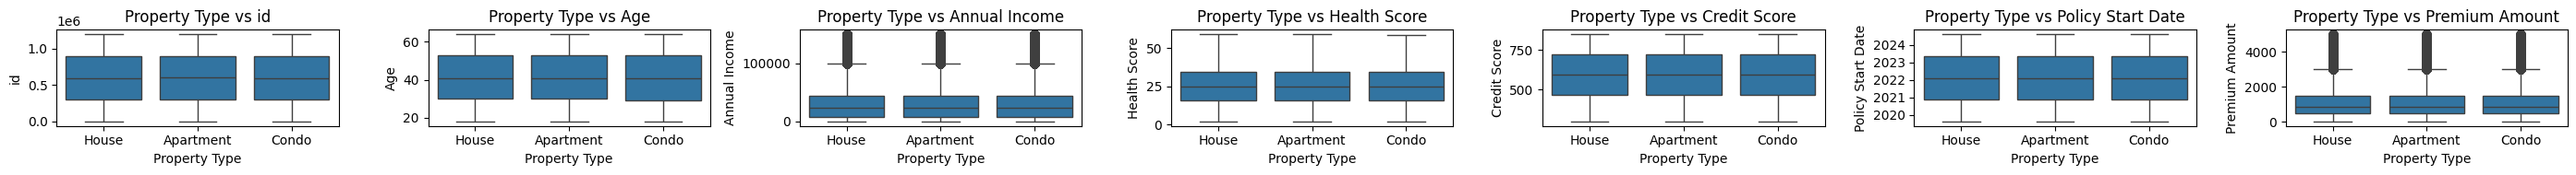

In [ ]:
for cat_col in categorical_features:
    if data[cat_col].nunique() < 10:  # Avoid very large plots
        num_plots = len(numerical_features)
        fig, axes = plt.subplots(1, num_plots, figsize=(4 * num_plots, 2))

        for i, num_col in enumerate(numerical_features):
            sns.boxplot(x=cat_col, y=num_col, data=data, ax=axes[i])
            axes[i].set_title(f'{cat_col} vs {num_col}')

        plt.tight_layout()
        plt.show()

categorical vs categorical relationship

e:\AI engineer\Guvi\Capstone Projects\Project3\fresh_clone\SmartPremium\venv\Lib\site-packages\pandas\plotting\_matplotlib\core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


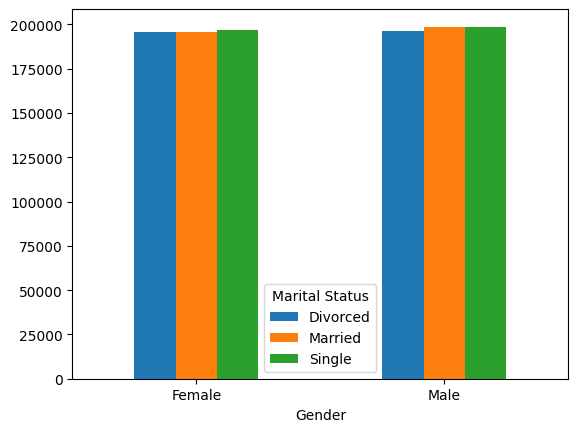

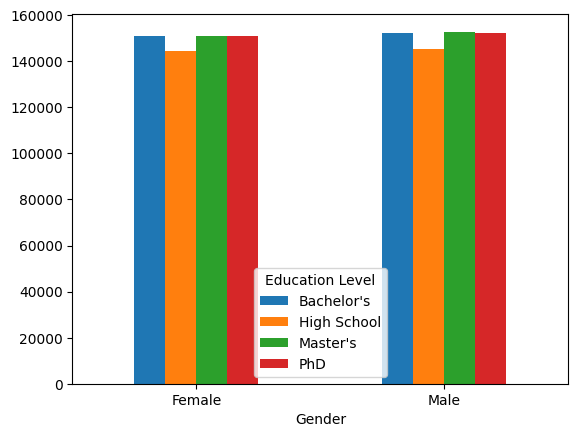

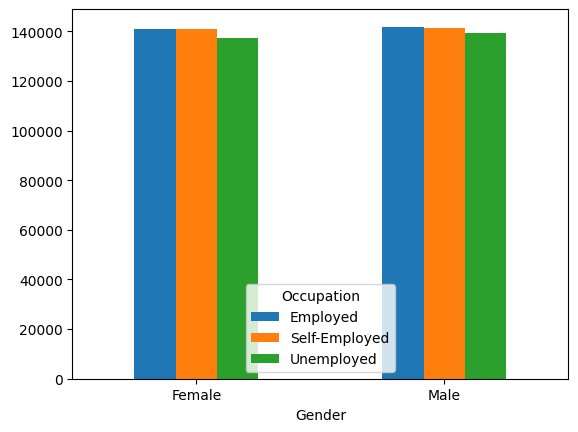

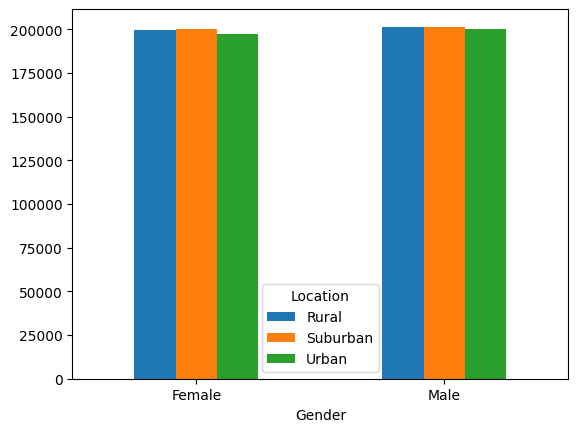

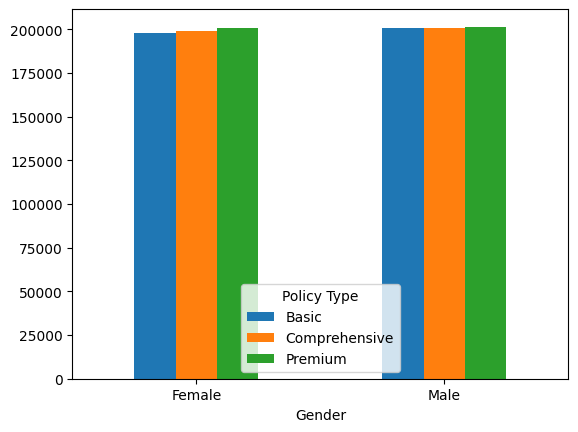

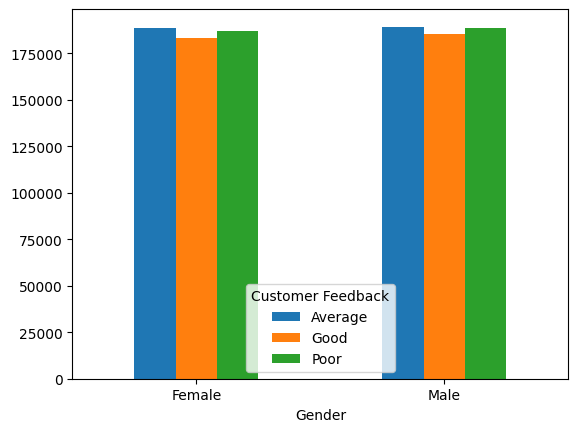

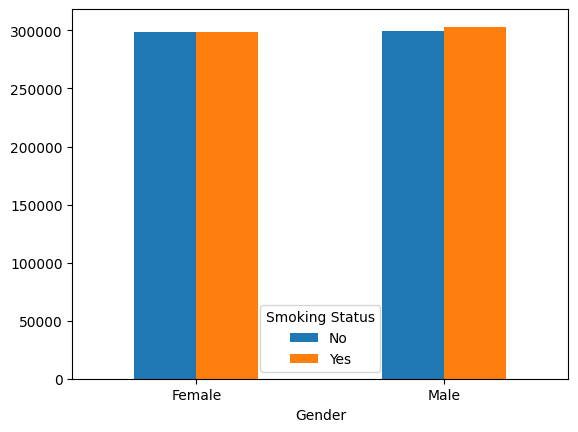

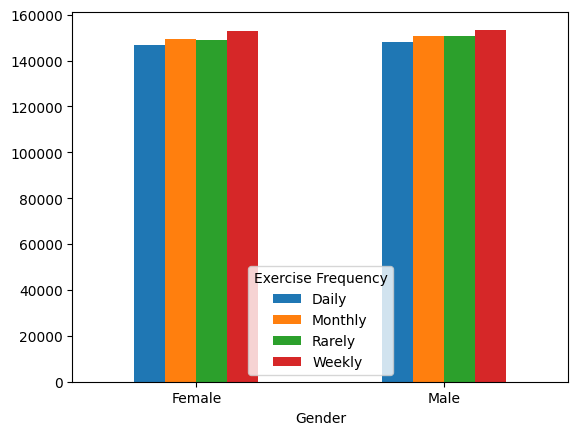

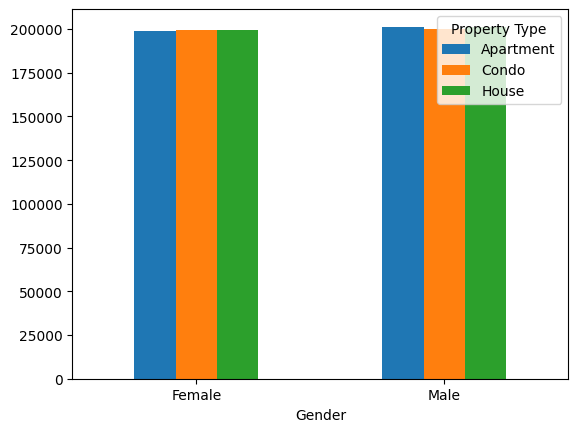

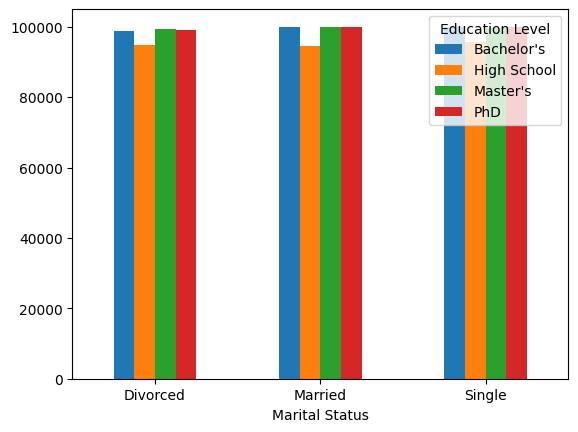

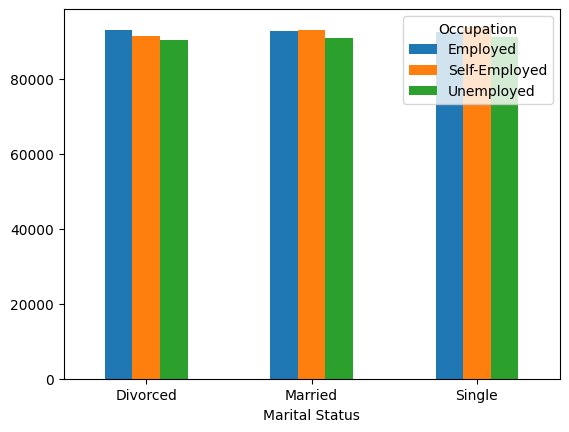

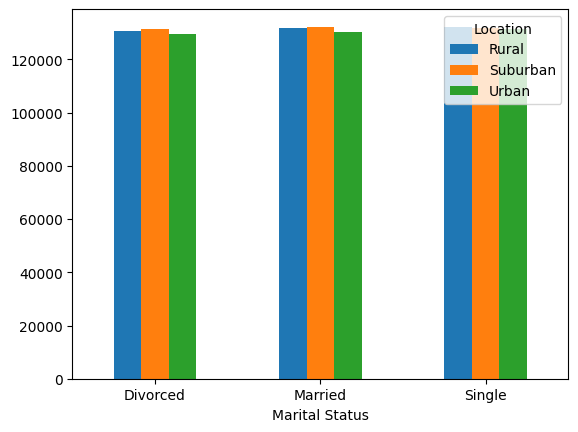

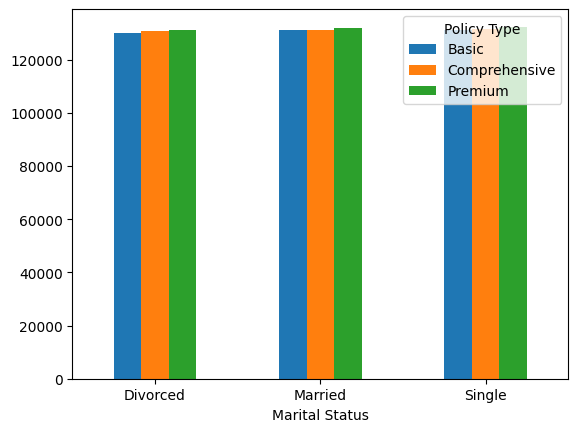

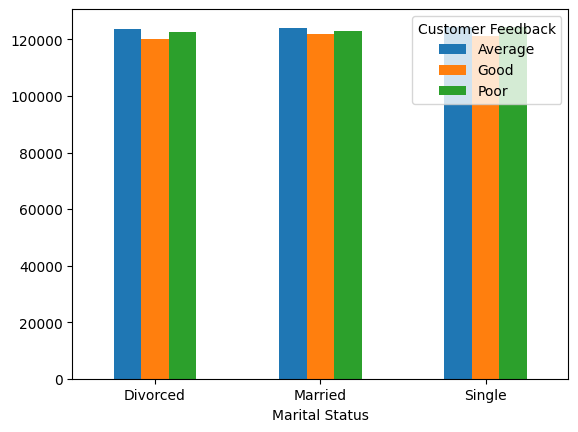

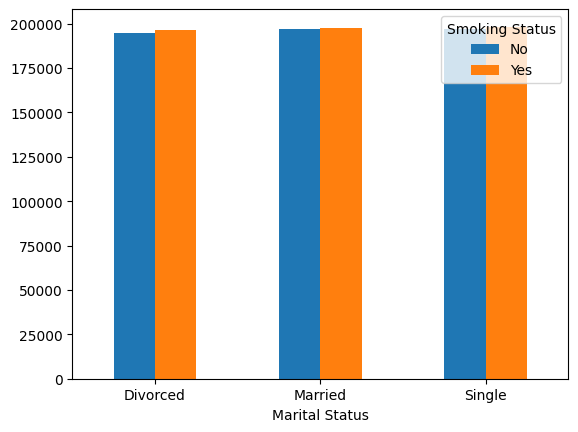

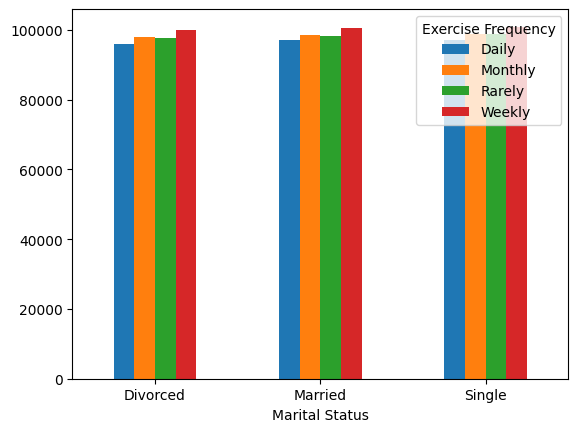

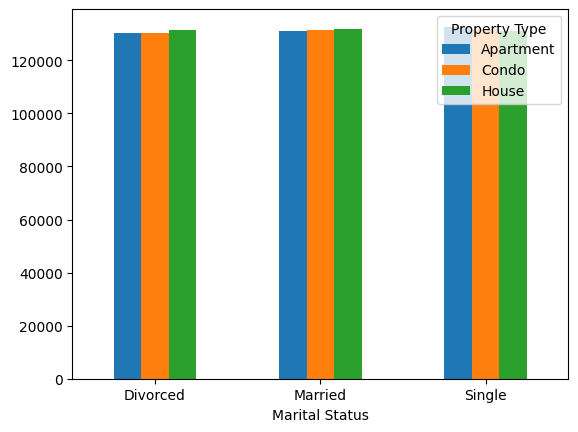

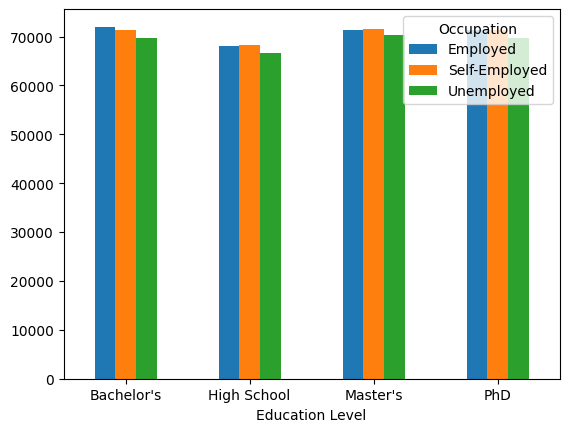

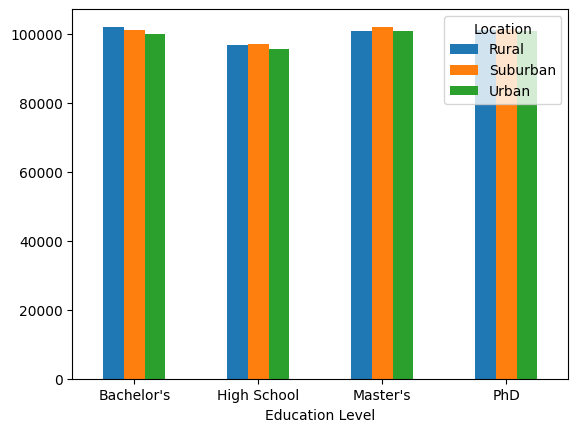

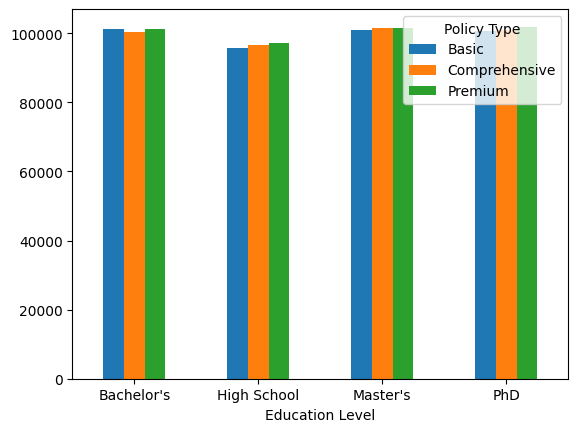

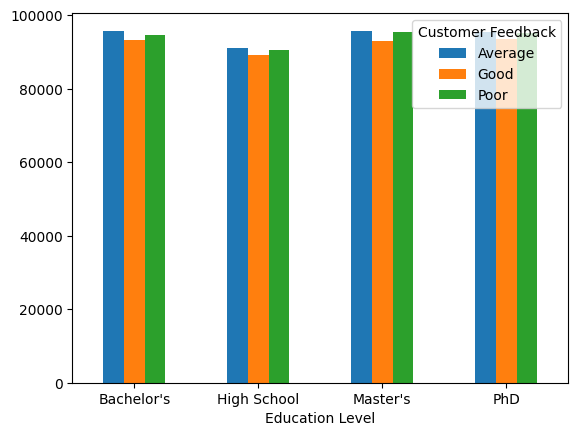

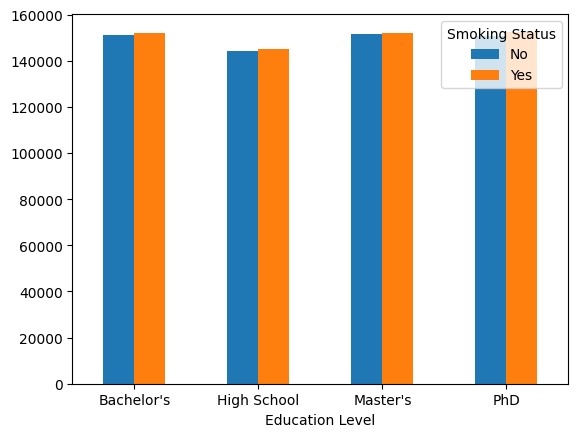

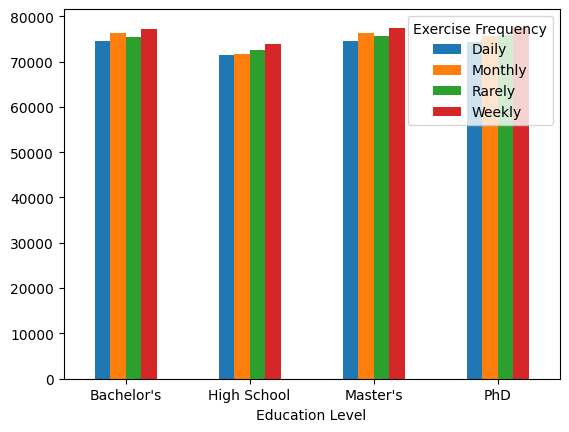

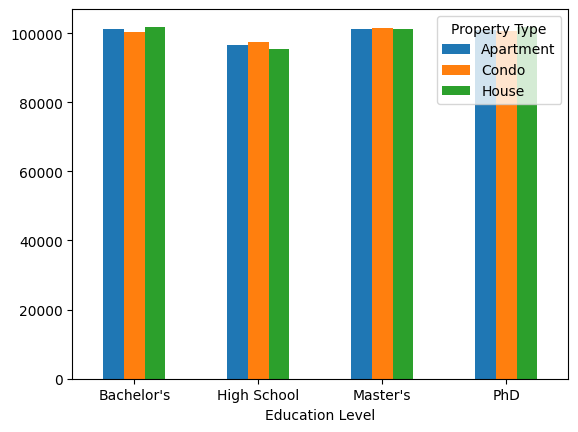

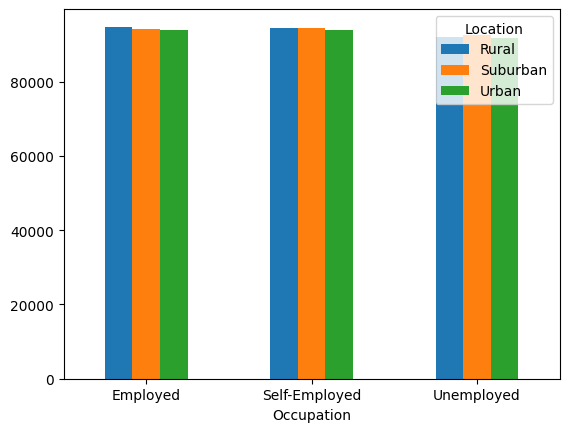

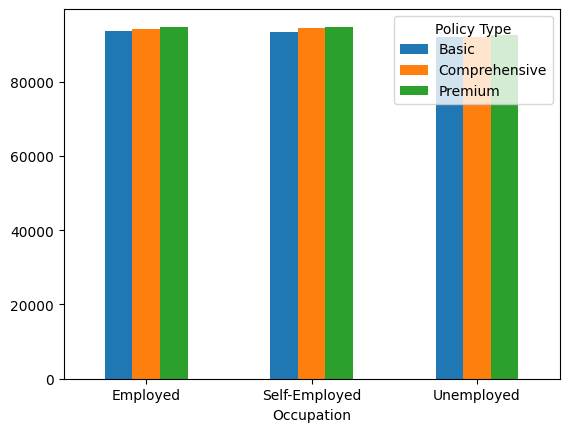

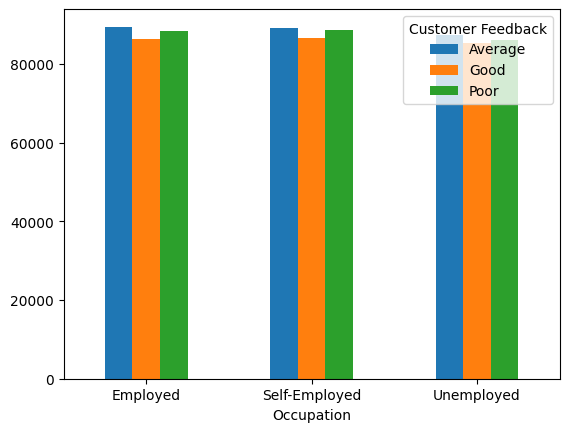

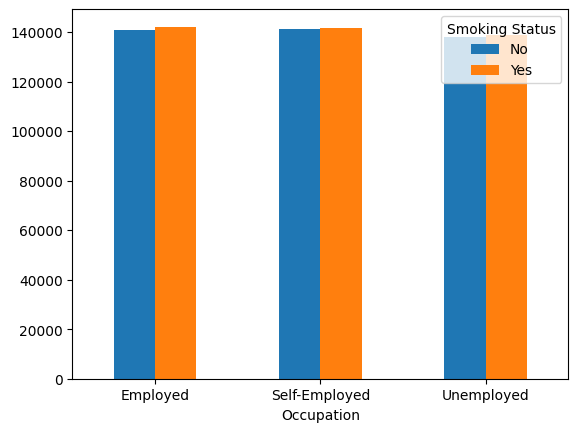

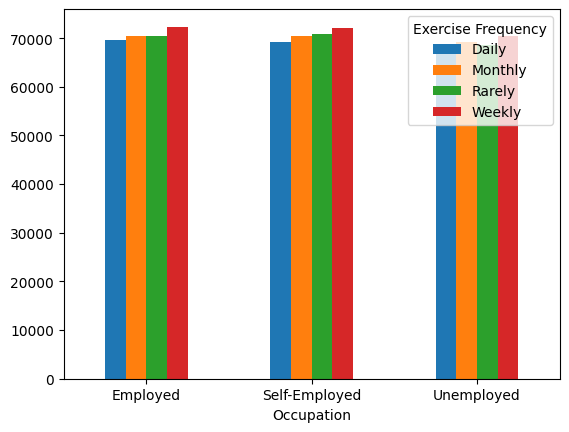

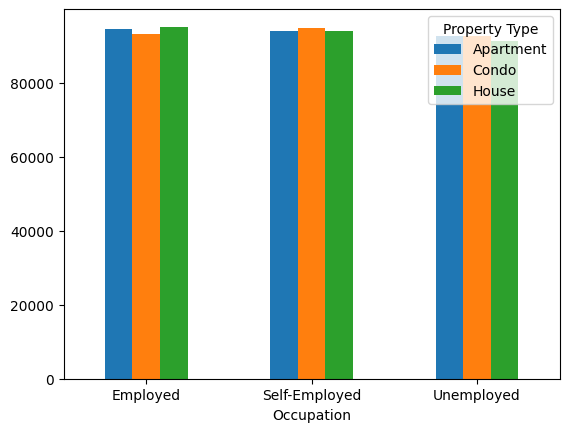

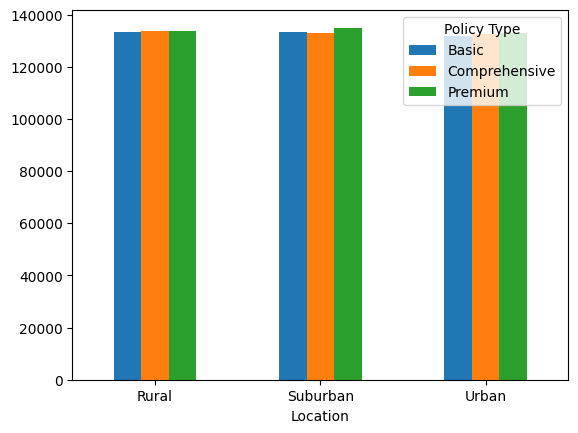

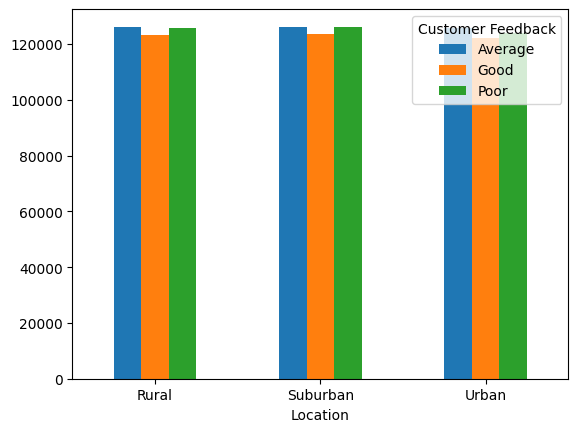

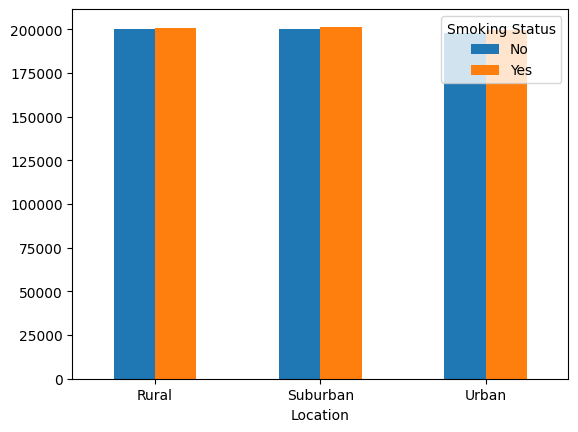

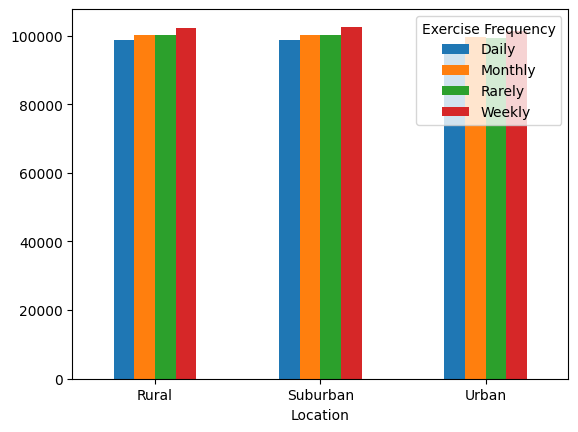

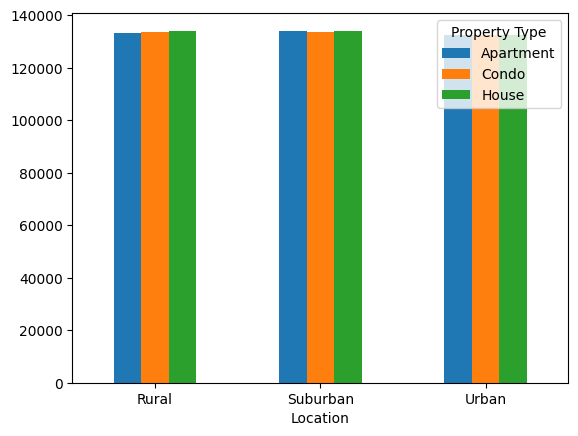

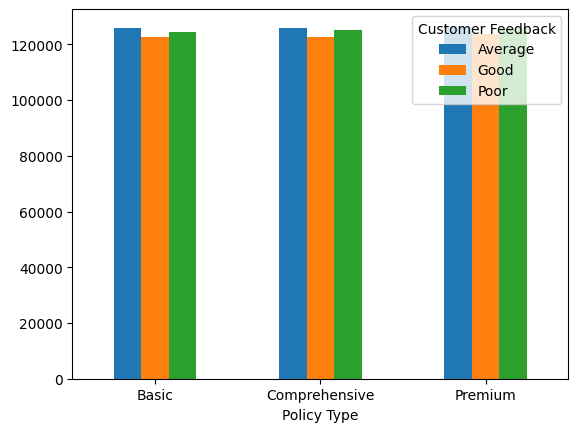

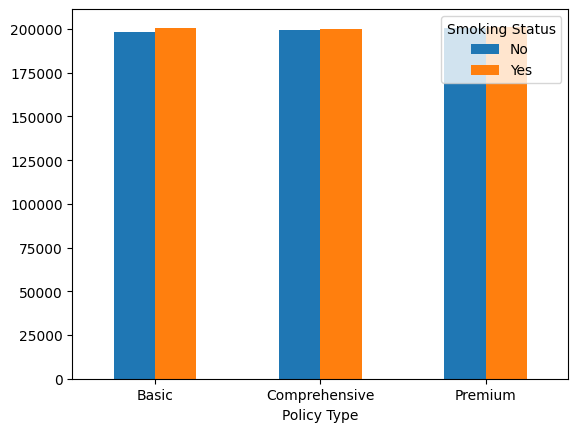

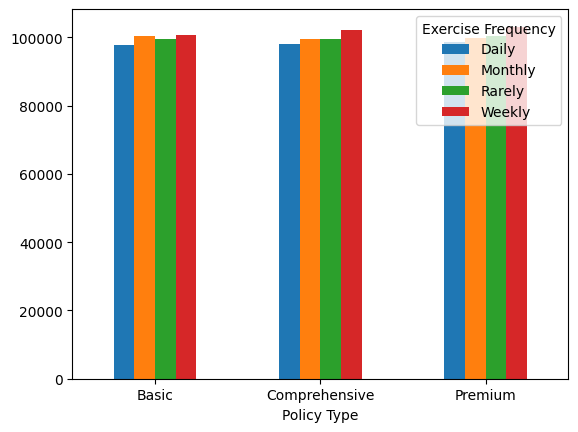

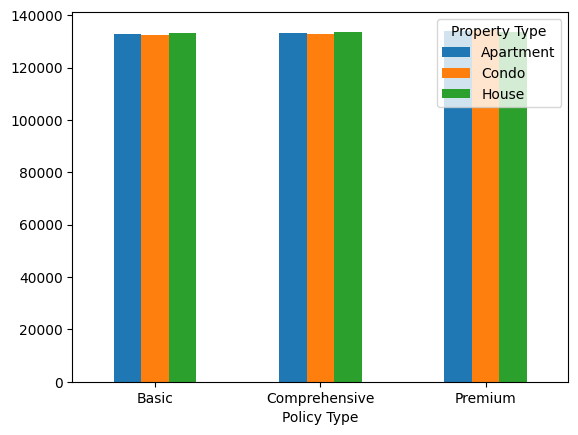

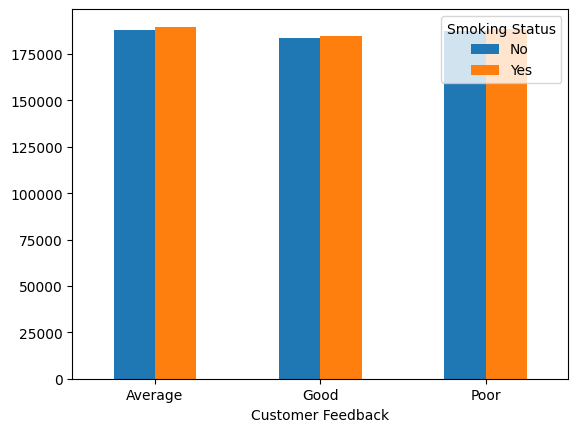

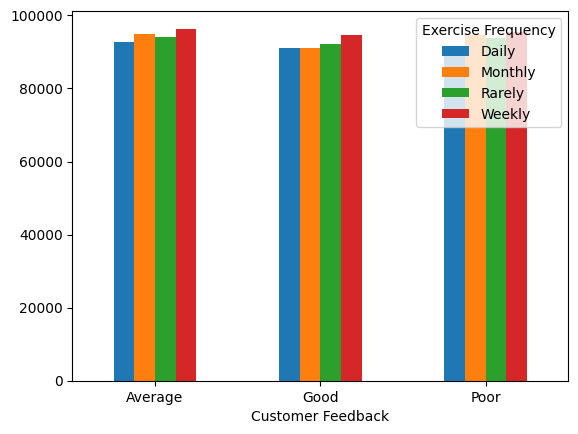

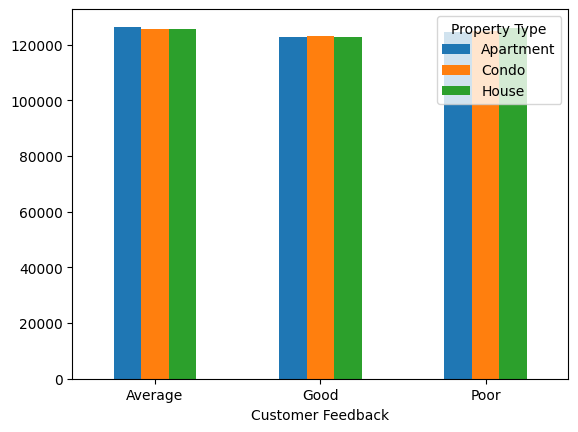

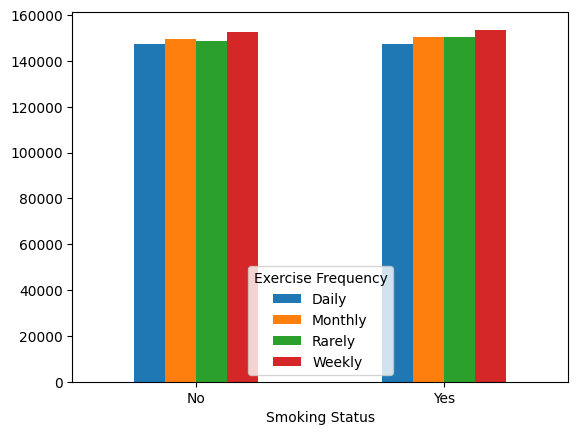

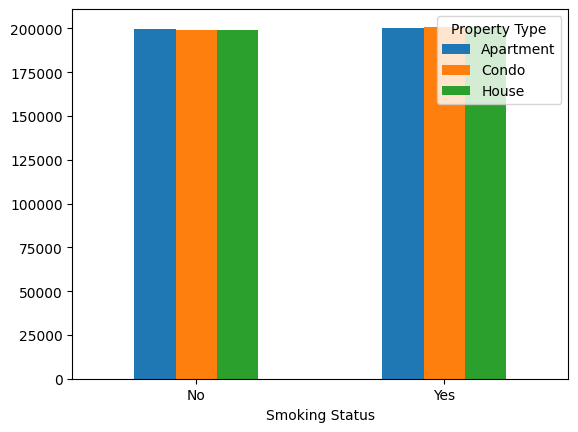

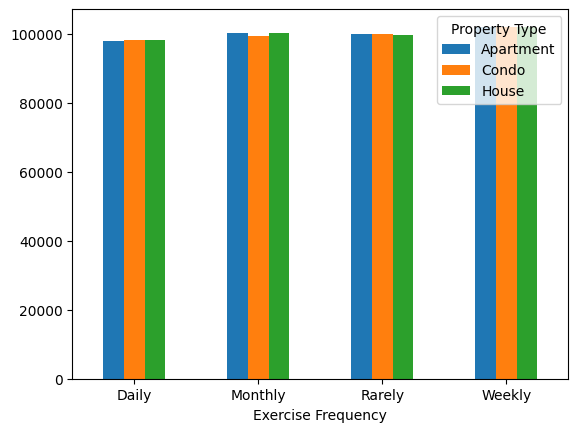

In [ ]:
for i in range(len(categorical_features)):
    for j in range(i + 1, len(categorical_features)):
        if data[categorical_features[i]].nunique() < 10 and data[categorical_features[j]].nunique() < 10: #Avoid huge tables
            contingency_table = pd.crosstab(data[categorical_features[i]], data[categorical_features[j]])
            #print(f"Contingency Table: {categorical_features[i]} vs {categorical_features[j]}\n{contingency_table}\n")
            # Creating barplot
            barplot = contingency_table.plot.bar(rot=0)


## Date vs. Numerical

C:\Users\bmaha\AppData\Local\Temp\ipykernel_9880\3158600334.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_premium = data.groupby(pd.Grouper(key='Policy Start Date', freq='M'))['Premium Amount'].mean()


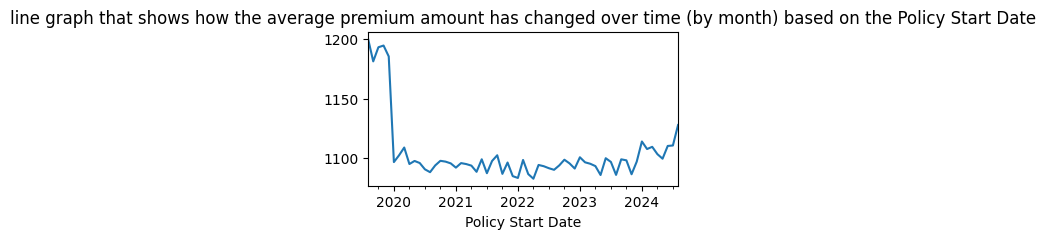

In [ ]:

monthly_premium = data.groupby(pd.Grouper(key='Policy Start Date', freq='M'))['Premium Amount'].mean()
plt.figure(figsize=(4, 2))
monthly_premium.plot()
plt.title('line graph that shows how the average premium amount has changed over time (by month) based on the Policy Start Date')
plt.show()

#### Target variable

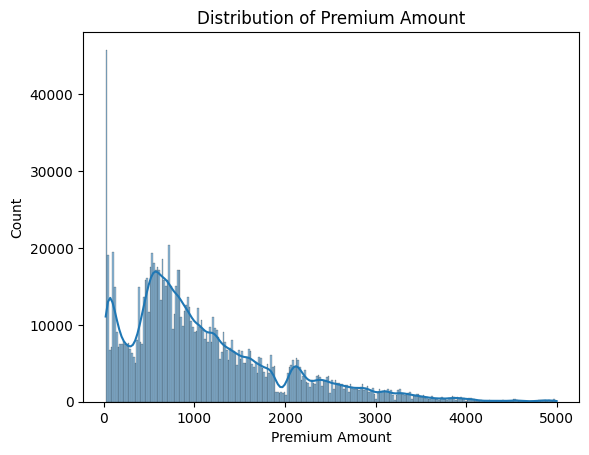

In [ ]:
sns.histplot(data['Premium Amount'], kde=True)
plt.title("Distribution of Premium Amount")
plt.show()

<Axes: xlabel='Premium Amount', ylabel='Density'>

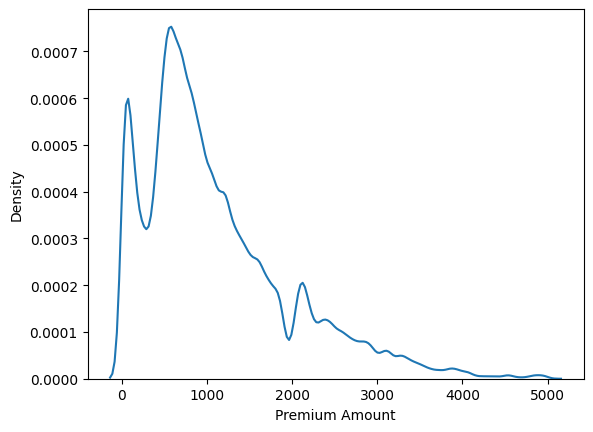

In [ ]:
sns.kdeplot(data['Premium Amount'])

Features vs Target

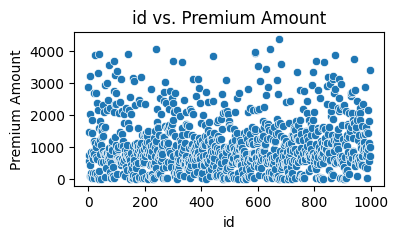

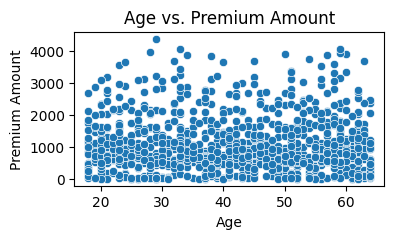

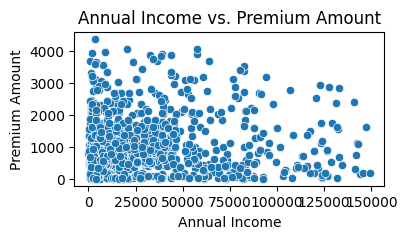

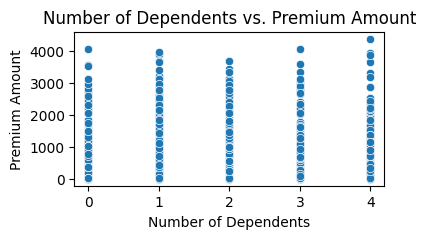

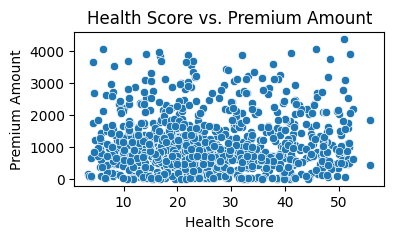

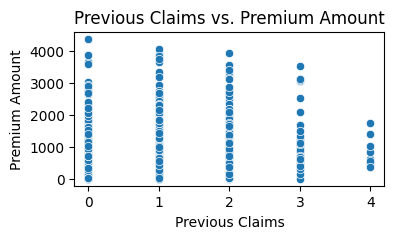

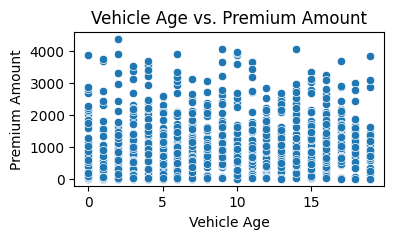

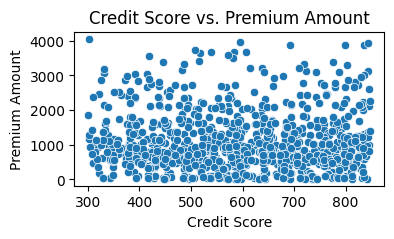

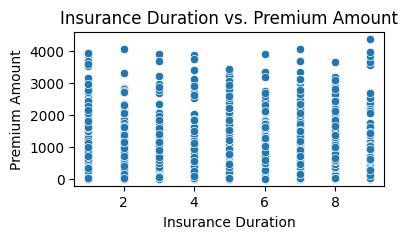

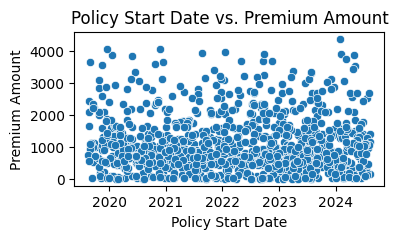

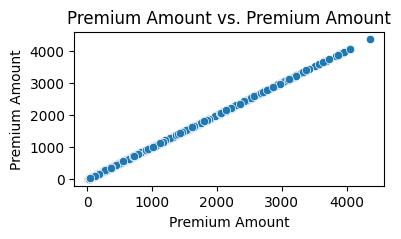

In [13]:
for feature in numerical_features:
    plt.figure(figsize=(4,2))
    sns.scatterplot(x=data[feature].head(1000), y=data['Premium Amount'].head(1000))
    plt.title(f"{feature} vs. Premium Amount")
    plt.show()

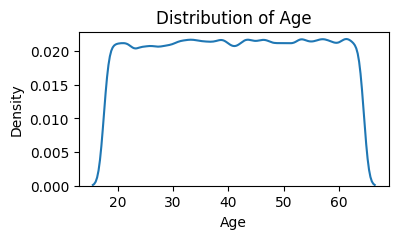

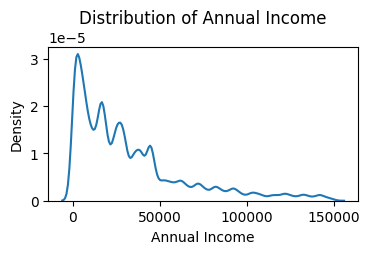

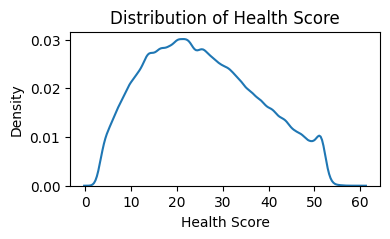

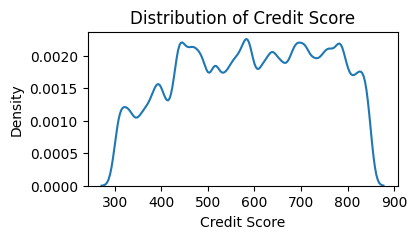

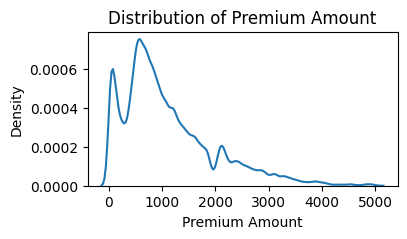

In [ ]:
for feature in numerical_features:
    plt.figure(figsize=(4,2))
    sns.kdeplot(data[feature])
    plt.title(f"Distribution of {feature}")
    plt.show()

Premium Amount          1.000000

Previous Claims         0.046874

Credit Score            0.026014

Health Score            0.014704

Annual Income           0.012390

Policy Start Date       0.010111

ANOVA test

The ANOVA test indicates that there is no statistically significant difference between the means of the groups being compared.

>0.05 - no signi difference

In [16]:
# ANOVA (Example: Policy Type vs. Premium Amount)
if 'Policy Type' in data.columns and 'Premium Amount' in data.columns:
    groups = [data['Premium Amount'][data['Policy Type'] == category] for category in data['Policy Type'].unique()]
    f_statistic, p_value = stats.f_oneway(*groups)
    print(f"ANOVA: F-statistic={f_statistic}, p-value={p_value}")

ANOVA: F-statistic=0.47091047756471593, p-value=0.6244335916398942


Chi- Square

The Chi-Square test indicates that there is a statistically significant association between the two categorical variables being compared.

>0.05 - no signi assosciation

In [17]:
# Chi-Square (Example: Gender vs. Smoking Status)
if 'Gender' in data.columns and 'Smoking Status' in data.columns:
    contingency = pd.crosstab(data['Gender'], data['Smoking Status'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency)
    print(f"Chi-Square: chi2={chi2}, p-value={p}")

Chi-Square: chi2=12.173083381361447, p-value=0.00048484092707482945


EDA Questions

In [23]:
# Data Cleaning (Basic - Imputation with median for numerical, mode for categorical)
numerical_cols = data.select_dtypes(include=['number']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

for col in numerical_cols:
    data[col].fillna(data[col].mean(), inplace=True)
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

Age and Premium Amount

How does "Age" influence "Premium Amount"? older customers tend to pay higher or lower premiums

In [62]:
sample_data=data.copy()

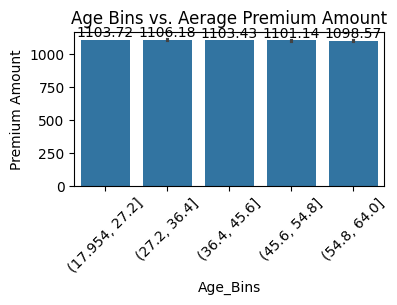

In [71]:
sample_data['Age_Bins'] = pd.cut(sample_data['Age'], bins=5)

plt.figure(figsize=(4,2))
ax=sns.barplot(x='Age_Bins', y='Premium Amount', data=sample_data)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Age Bins vs. Aerage Premium Amount')
plt.xticks(rotation=45)
plt.show()

What is the relationship between "Annual Income" and "Premium Amount"?

This examines if income level correlates with premium costs.

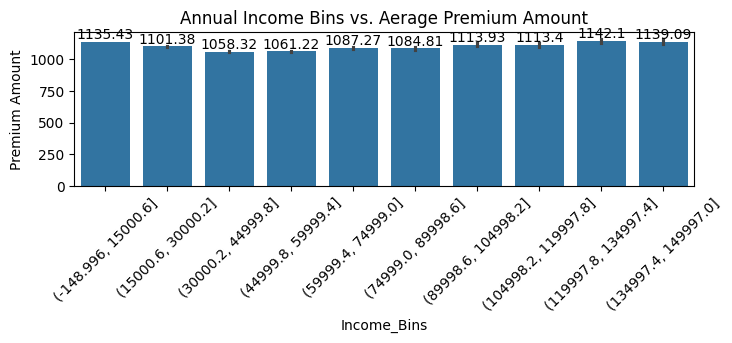

In [ ]:

sample_data['Income_Bins'] = pd.cut(sample_data['Annual Income'], bins=10)

plt.figure(figsize=(8, 2))
ax=sns.barplot(x='Income_Bins', y='Premium Amount', data=sample_data)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Annual Income Bins vs. Aerage Premium Amount')
plt.xticks(rotation=45)
plt.show()

In [55]:
print(sample_data["Annual Income"].min(),sample_data["Annual Income"].max())

1.0 149997.0


Does "Health Score" have a significant impact on "Premium Amount"?

This explores if healthier individuals get better premium rates.

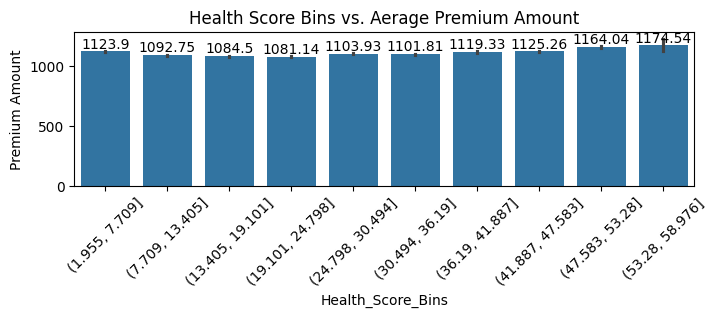

In [65]:
sample_data['Health_Score_Bins'] = pd.cut(sample_data['Health Score'], bins=10)

plt.figure(figsize=(8, 2))
ax=sns.barplot(x='Health_Score_Bins', y='Premium Amount', data=sample_data)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Health Score Bins vs. Aerage Premium Amount')
plt.xticks(rotation=45)
plt.show()

Is there a correlation between "Credit Score" and "Premium Amount"?

This investigates if creditworthiness affects premium calculations.

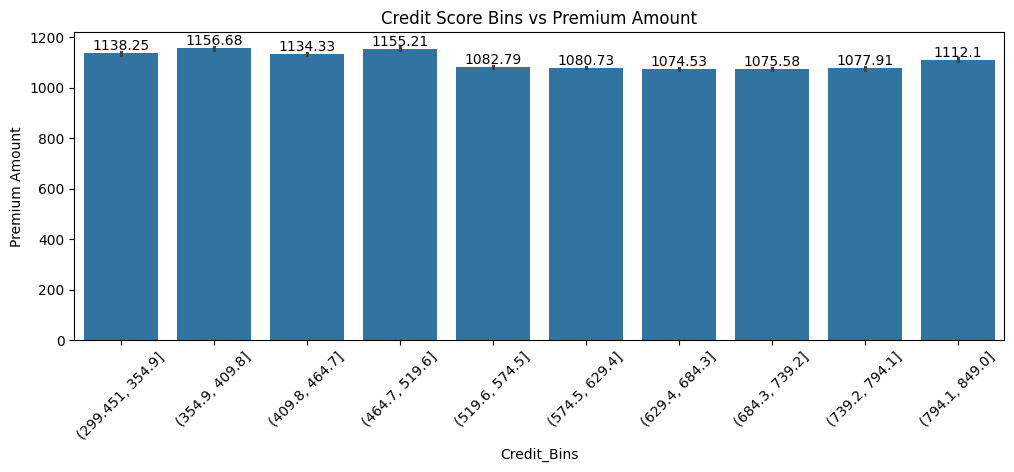

In [79]:
sample_data['Credit_Bins'] = pd.cut(sample_data['Credit Score'], bins=10)
plt.figure(figsize=(12,4))
ax=sns.barplot(x='Credit_Bins', y = 'Premium Amount', data = sample_data)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("Credit Score Bins vs Premium Amount")
plt.xticks(rotation=45)
plt.show()

Premium Amount by Gender and Smoking Status

TypeError: Axes.bar_label() missing 1 required positional argument: 'container'

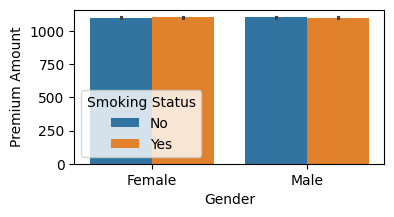

In [ ]:
plt.figure(figsize=(4, 2))
ax=sns.barplot(x='Gender', y='Premium Amount', hue='Smoking Status', data=data)
ax.bar_label(ax.containers,fontsize=10)
plt.title('Premium Amount by Gender and Smoking Status')
plt.show()